In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import rasterio 
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
from windrose import WindroseAxes



In [ ]:
#Prints the current working directory
os.getcwd()

In [ ]:
# To set the working directory
os.chdir("D:\Tokaj_Morpho_Tectonic\Python")

In [ ]:
os.getcwd()

In [16]:
DEM = r"D:\Tokaj_Morpho_Tectonic\Polsar_images\DEM_Creation_Polsar\DEM_Tokaj_Polsar.tif"
gdal_data = gdal.Open(DEM)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# Convert to numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary 
if np.any(data_array == nodataval): data_array[data_array == nodataval] = np.nan

Visualize Data with MAtplotlib

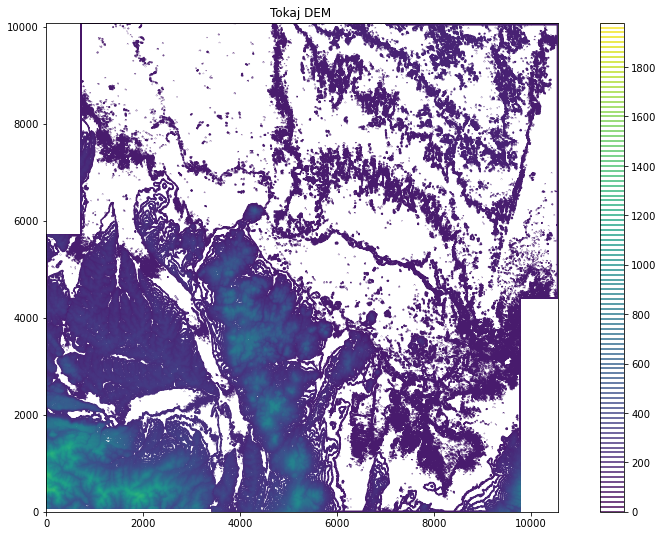

In [17]:
#Plot out data with Matplotlib's 'ColorPlot'
fig = plt.figure(figsize = (15, 9))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 2000, 20)))
plt.title("Tokaj DEM ")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

 Open the Raster with Rasterio

In [18]:
#Import vector data
NE_Directional = gpd.read_file(r"D:\Tokaj_Morpho_Tectonic\Derived_DEM_TIFF\Vector_From_Raster\Simplified_SHP\North_East_Directional_NP1_Douglas_Peucker100T_Exploaded.shp")
SE_Directional = gpd.read_file(r"D:\Tokaj_Morpho_Tectonic\Derived_DEM_TIFF\Vector_From_Raster\Simplified_SHP\South_East_Directional_NP1_Douglas_Peucker100T_Exploded.shp")



In [19]:
print(NE_Directional.head())
print(NE_Directional.geom_type)


   ID  Length  Azi_rad     Azi_deg  region  \
0   1     319    5.837  334.435465       3   
1   5     816    5.661  324.351408       3   
2   6     779    0.521   29.851101       3   
3   7     292    5.528  316.731069       3   
4   8     976    0.118    6.760902       3   

                                            geometry  
0  LINESTRING (569531.655 5318625.617, 569394.155...  
1  LINESTRING (528844.155 5328013.117, 528369.155...  
2  LINESTRING (526931.655 5328300.617, 527319.155...  
3  LINESTRING (529444.155 5328550.617, 529244.155...  
4  LINESTRING (528369.155 5328675.617, 528431.655...  
0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
3508    LineString
3509    LineString
3510    LineString
3511    LineString
3512    LineString
Length: 3513, dtype: object


epsg:32634
[ 491856.65505288 5318625.6166675   571806.65505288 5397575.6166675 ]
(3513, 6)


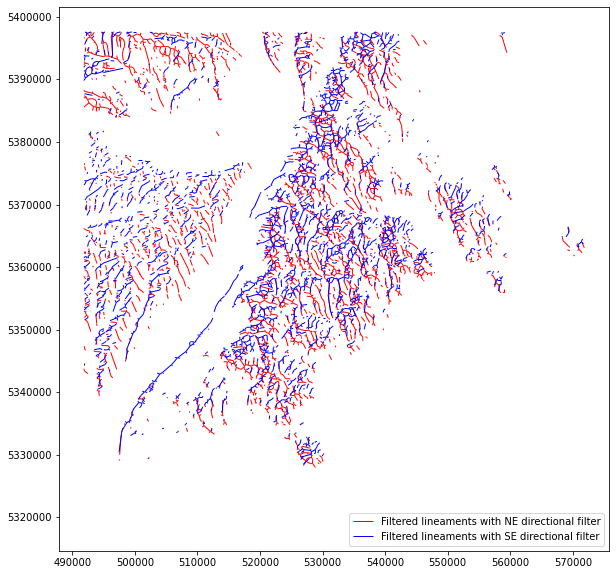

In [20]:

# View the CRS of the NE_Directional
print(NE_Directional.crs)

# View the spatial extent 
# the data type
type(NE_Directional)
print(NE_Directional.total_bounds)

# How many features are in the shapefile
print(NE_Directional.shape)

# Reproject the Vector data to the same CRS of the Study_Area_DEM


# Reproject the aoi to the same CRS as the state_boundary_use object
#Reproj_NE_Directional= NE_Directional.to_crs(23700)

# View CRS of new reprojected layer
#print(Reproj_NE_Directional.total_bounds)
#print('Reproj_NE_Directional crs: ',Reproj_NE_Directional.crs)




#This is the plot function
fig, ax = plt.subplots(figsize=(10,10))

#plot the data using geopandas.plot() method
NE_Directional.plot(ax=ax, color ='red', linewidth=1)
SE_Directional.plot(ax=ax, color='blue', linewidth=1)
#ax.plot(range(485000,570000,5000), range(532000,540000,1000 ))
ax.ticklabel_format(style='plain')
plt.legend(["Filtered lineaments with NE directional filter", "Filtered lineaments with SE directional filter"], loc="lower right")
plt.show()


EPSG:23700
1


<AxesSubplot:>

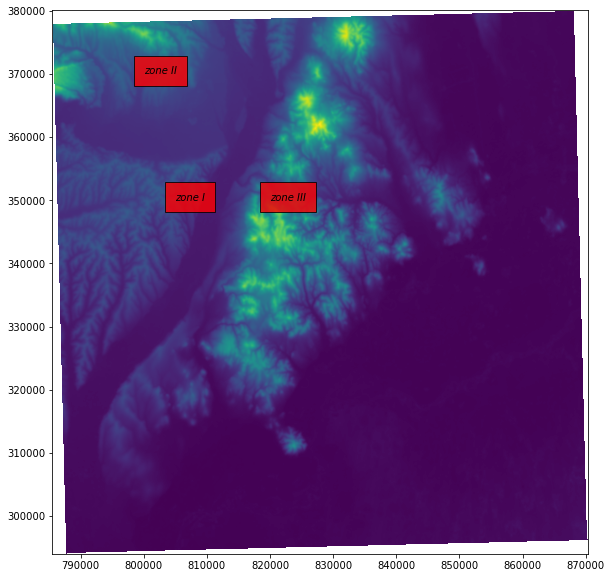

In [21]:
# Open a raster file
Tokaj = r'D:\Tokaj_Morpho_Tectonic\Study_area_DEM.tif'
img = rasterio.open(Tokaj)
print(img.crs)
print(img.count)
fig, ax = plt.subplots(figsize=(10,10))
ax.text(805000, 350000, 'zone I', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})
ax.text(800000, 370000, 'zone II', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})
ax.text(820000, 350000, 'zone III', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.8, 'pad': 10})

#NE_Directional.plot(ax=ax, color="black")
show(img, ax=ax)


# Windrose plot for lineaments direction

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Filtered lineaments with NE directional filter: Zone number 1')

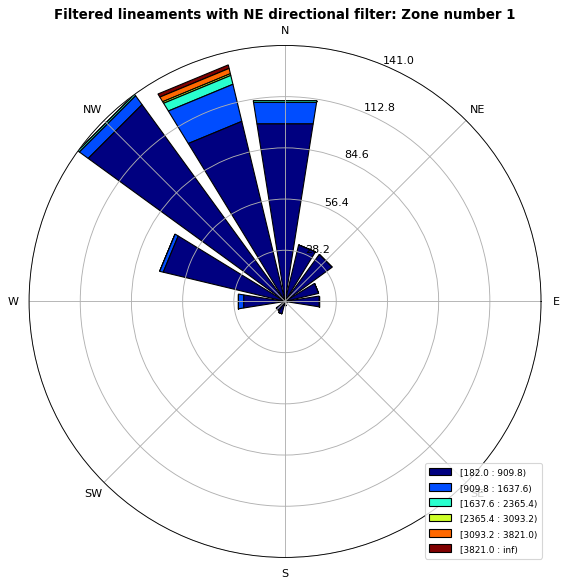

In [22]:
#Import Tabular Data from a CSV file into a Pandas
import pandas as pd
from windrose import WindroseAxes
import matplotlib.cm as cm


Azimuth_NE_Region1 = pd.read_csv(r'D:\Tokaj_Morpho_Tectonic\Excel_Files\North_East_Directional_NP1_RegionOne_CSV.csv')

print(type(Azimuth_NE_Region1))
#print(Azimuth_NE_Region1.head())
#display(Azimuth_NE_Region1)

dir = Azimuth_NE_Region1['Azi_deg']
len = Azimuth_NE_Region1 ['Length']

#Azi_rad_column = Azimuth_NE_Region1.loc[:, "Azi_rad"]
#Azi_rad = Azi_rad_column.values
#print(Azi_rad)


#Length_Column = Azimuth_NE_Region1.loc[:, "Length"]
#Length = Length_Column.values


ax1 = WindroseAxes.from_ax()
ax1.bar(dir,len, opening=0.8, edgecolor="k")
ax1.set_legend(loc = "lower right")
ax1.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
ax1.set_title('Filtered lineaments with NE directional filter: Zone number 1', fontweight ="bold", loc="Center")

#help(ax.bar)

[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

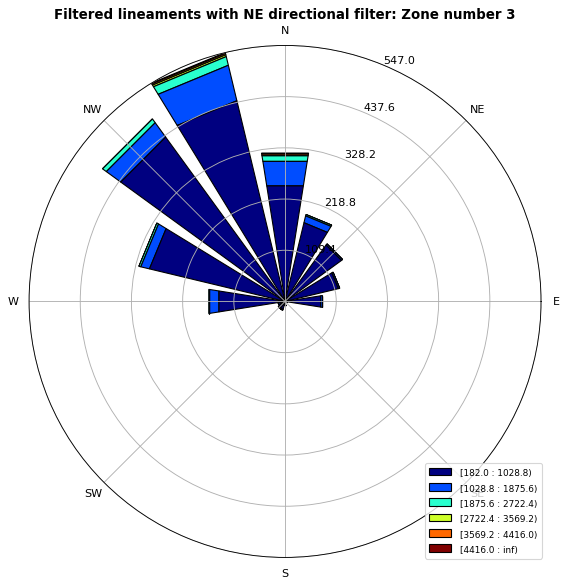

In [23]:
Azimuth_NE_Region3 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\North_East_Directional_NP1_RegionThree_CSV.csv')
#display(Azimuth_NE_Region3)

dir3 = Azimuth_NE_Region3['Azi_deg']
len3 = Azimuth_NE_Region3 ['Length']


ax3 = WindroseAxes.from_ax()
ax3.set_title('Filtered lineaments with NE directional filter: Zone number 3', fontweight ="bold", loc="Center")
ax3.bar(dir3,len3, opening=0.8, edgecolor="k")
ax3.set_legend(loc = "lower right")
ax3.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])


,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,3,1053,0.810603,46.444131,1,NaN,NaN,NaN,NaN,range,frequency
1,6,320,0.674741,38.659812,1,NaN,NaN,NaN,NaN,0,6
2,7,593,0.605545,34.695173,1,NaN,NaN,NaN,NaN,5,18
3,8,310,0.813962,46.636587,1,NaN,NaN,NaN,NaN,10,18
4,9,1366,1.292497,74.054623,1,NaN,NaN,NaN,NaN,15,23
...,...,...,...,...,...,...,...,...,...,...,...
669,1162,1030,0.368696,21.124725,1,NaN,NaN,NaN,NaN,NaN,NaN
670,1162,1030,0.967047,55.407712,1,NaN,NaN,NaN,NaN,NaN,NaN
671,1164,327,5.524808,316.548181,1,NaN,NaN,NaN,NaN,NaN,NaN
672,1165,550,1.270625,72.801450,1,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

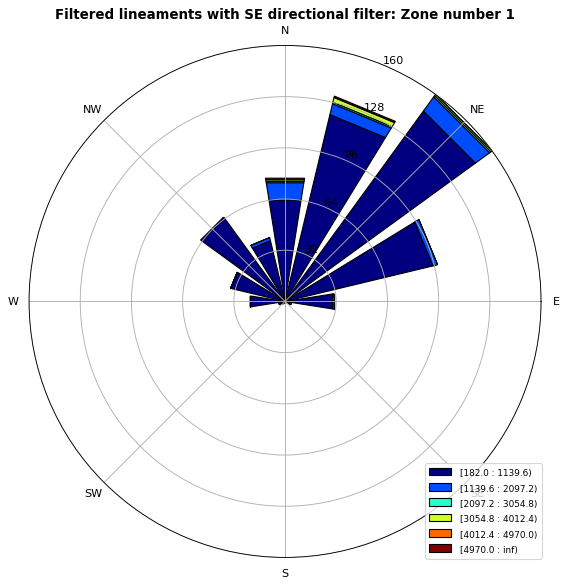

In [24]:
Azimuth_SE_Region1 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\South_East_Directional_NP1_RegionOne_CSV.csv')
display(Azimuth_SE_Region1)

dir11 = Azimuth_SE_Region1['Azi_deg']
len11 = Azimuth_SE_Region1 ['Length']


ax11 = WindroseAxes.from_ax()
ax11.set_title('Filtered lineaments with SE directional filter: Zone number 1', fontweight ="bold", loc="Center")
ax11.bar(dir11,len11, opening=0.8, edgecolor="k")
ax11.set_legend(loc = "lower right")
ax11.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])


,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1516,526,0.047583,2.726305,3,NaN,NaN,NaN,NaN,range,frequency
1,1517,693,1.444204,82.746794,3,NaN,NaN,NaN,NaN,0,29
2,1519,619,0.785398,44.999991,3,NaN,NaN,NaN,NaN,5,71
3,1520,420,5.886106,337.249032,3,NaN,NaN,NaN,NaN,10,89
4,1522,223,5.378358,308.157214,3,NaN,NaN,NaN,NaN,15,95
...,...,...,...,...,...,...,...,...,...,...,...
2422,6120,369,1.152572,66.037511,3,NaN,NaN,NaN,NaN,NaN,NaN
2423,6122,268,1.086318,62.241437,3,NaN,NaN,NaN,NaN,NaN,NaN
2424,6134,628,3.362421,192.652532,3,NaN,NaN,NaN,NaN,NaN,NaN
2425,6140,463,1.570796,89.999981,3,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

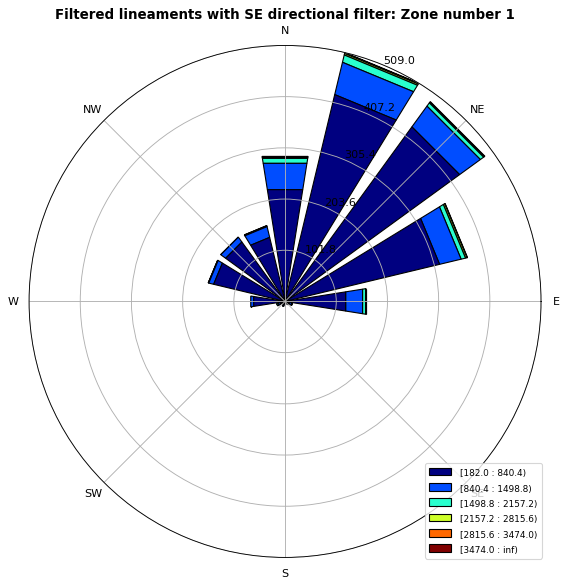

In [25]:
Azimuth_SE_Region3 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\South_East_Directional_NP1_RegionThree_CSV.csv')
display(Azimuth_SE_Region3)

dir33 = Azimuth_SE_Region3['Azi_deg']
len33 = Azimuth_SE_Region3 ['Length']


ax33 = WindroseAxes.from_ax()
ax33.set_title('Filtered lineaments with SE directional filter: Zone number 1', fontweight ="bold", loc="Center")
ax33.bar(dir33,len33, opening=0.8, edgecolor="k")
ax33.set_legend(loc = "lower right")
ax33.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

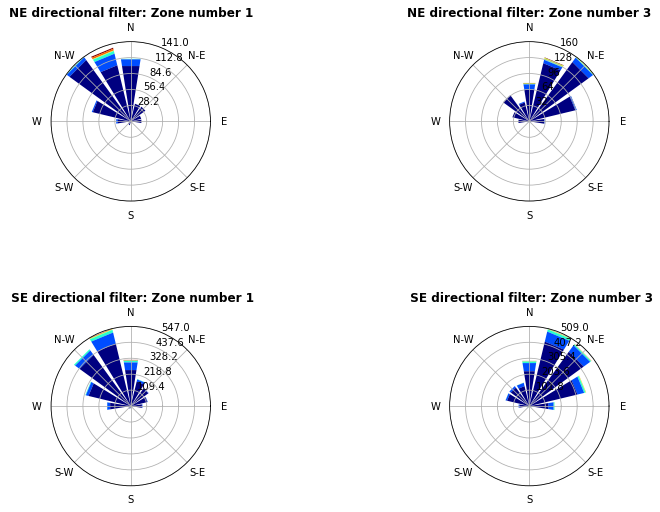

In [26]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
plt.tight_layout(pad=9.0)
ax1 = fig.add_subplot(gs[0,0], projection = "windrose")
ax1.bar(dir,len)
ax1.set_title('NE directional filter: Zone number 1', fontweight ="bold", loc="Center", fontsize=12)


ax11 = fig.add_subplot(gs[0,1], projection = "windrose")
ax11.bar(dir11,len11)
ax11.set_title('NE directional filter: Zone number 3', fontweight ="bold", loc="Center", fontsize=12)


ax3 = fig.add_subplot(gs[1,0], projection = "windrose")
ax3.bar(dir3,len3)
ax3.set_title(' SE directional filter: Zone number 1', fontweight ="bold", loc="Center", fontsize=12)


ax33 = fig.add_subplot(gs[1,1], projection = "windrose")
ax33.bar(dir33,len33)
ax33.set_title(' SE directional filter: Zone number 3', fontweight ="bold", loc="Center", fontsize=12)
plt.subplots_adjust(hspace=0.1, wspace=1.5)

# Plot Hmax of the processed Faults: Dexter and Sinister for both zones

[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

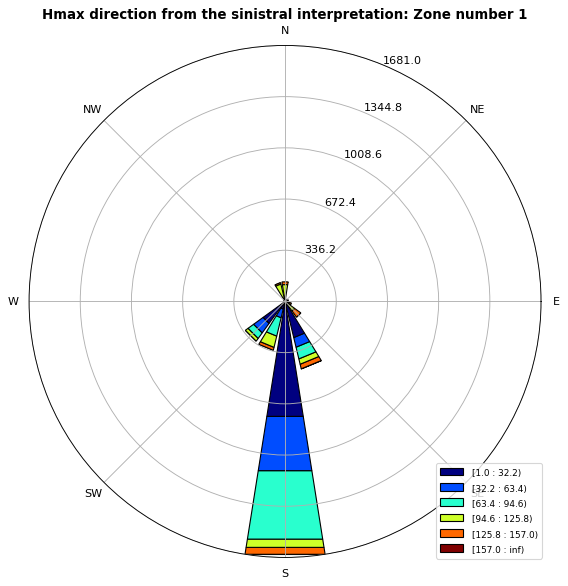

In [27]:
Sinister_Region1 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\Faults_West_Tokaj_Sinister_RegionOne.csv')
#display(Azimuth_SE_Region1)

dirS1 = Sinister_Region1['HMAX_deg']
countS1 = Sinister_Region1 ['COUNT']


ax11 = WindroseAxes.from_ax()
ax11.set_title('Hmax direction from the sinistral interpretation: Zone number 1', fontweight ="bold", loc="Center")
ax11.bar(dirS1,countS1, opening=0.8, edgecolor="k")
ax11.set_legend(loc = "lower right")
ax11.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

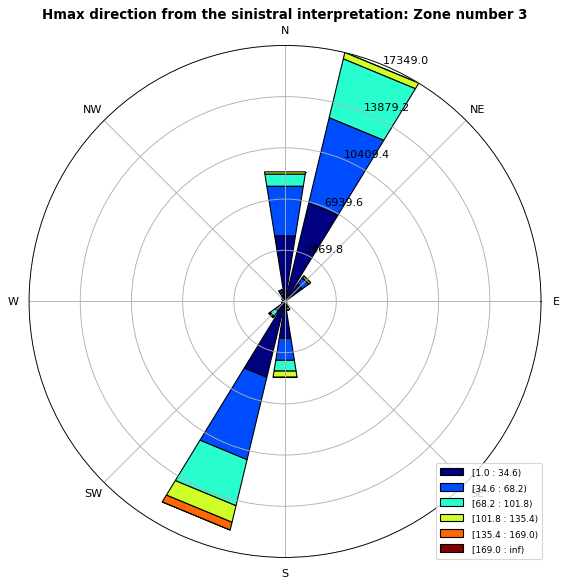

In [28]:
Sinister_Region3 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\Faults_West_Tokaj_Sinister_RegionThree.csv')


dirS3 = Sinister_Region3['HMAX_deg']
countS3 = Sinister_Region3 ['COUNT']


ax11 = WindroseAxes.from_ax()
ax11.set_title('Hmax direction from the sinistral interpretation: Zone number 3', fontweight ="bold", loc="Center")
ax11.bar(dirS3,countS3, opening=0.8, edgecolor="k")
ax11.set_legend(loc = "lower right")
ax11.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

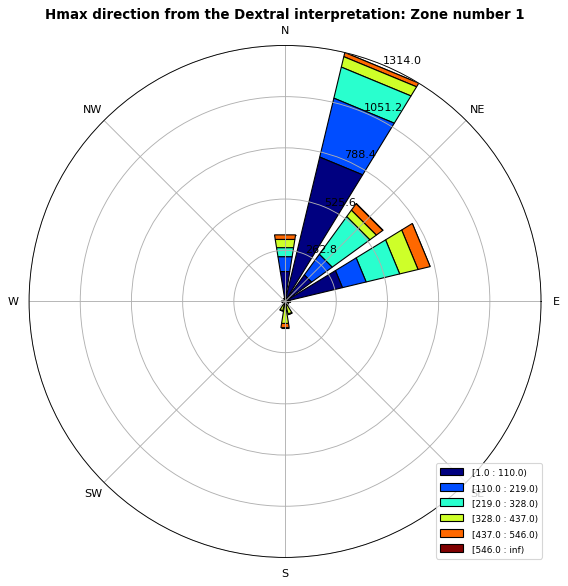

In [29]:
Dextral_Region1 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\Faults_West_Tokaj_Dexter_RegionOne.csv')


dirD1 = Dextral_Region1['HMAX_deg']
countD1 = Dextral_Region1 ['COUNT']


ax11 = WindroseAxes.from_ax()
ax11.set_title('Hmax direction from the Dextral interpretation: Zone number 1', fontweight ="bold", loc="Center")
ax11.bar(dirD1,countD1, opening=0.8, edgecolor="k")
ax11.set_legend(loc = "lower right")
ax11.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'NW'),
 Text(3.141592653589793, 0, 'W'),
 Text(3.9269908169872414, 0, 'SW'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'SE')]

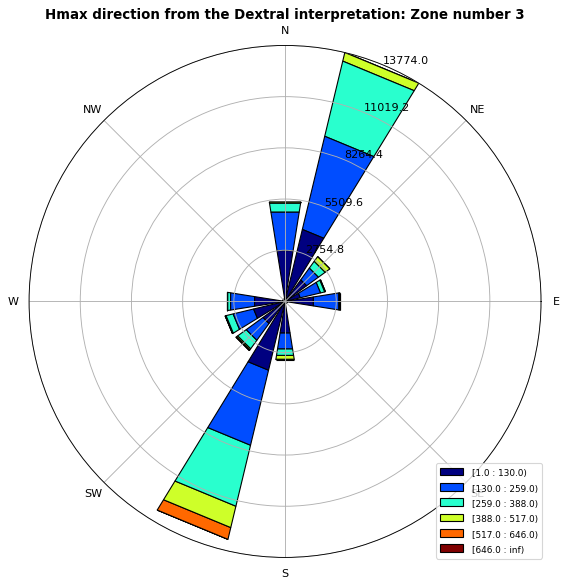

In [30]:
Dextral_Region3 = pd.read_csv (r'D:\Tokaj_Morpho_Tectonic\Excel_Files\Faults_West_Tokaj_Dexter_RegionThree.csv')


dirD3 = Dextral_Region3['HMAX_deg']
countD3 = Dextral_Region3 ['COUNT']


ax11 = WindroseAxes.from_ax()
ax11.set_title('Hmax direction from the Dextral interpretation: Zone number 3', fontweight ="bold", loc="Center")
ax11.bar(dirD3,countD3, opening=0.8, edgecolor="k")
ax11.set_legend(loc = "lower right")
ax11.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

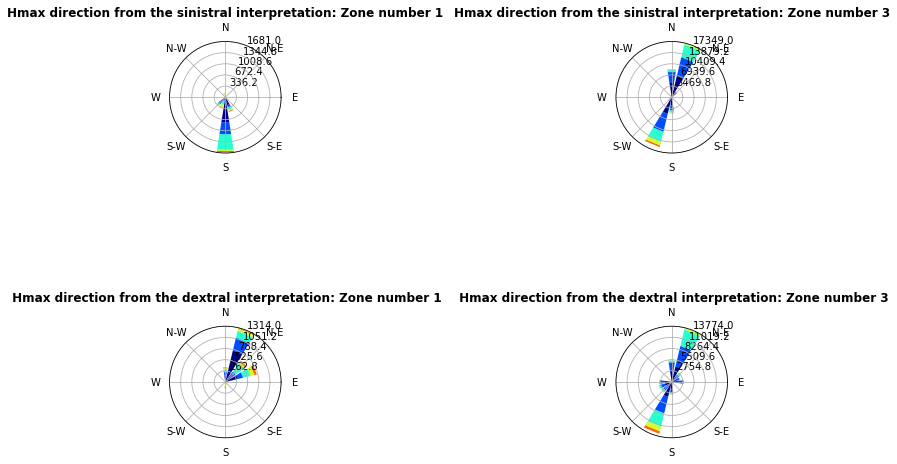

In [31]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(2,2)
plt.tight_layout(pad=9.0)
ax1 = fig.add_subplot(gs[0,0], projection = "windrose")
ax1.bar(dirS1,countS1)
ax1.set_title('Hmax direction from the sinistral interpretation: Zone number 1', fontweight ="bold", loc="Center", fontsize=12)


ax11 = fig.add_subplot(gs[0,1], projection = "windrose")
ax11.bar(dirS3,countS3)
ax11.set_title('Hmax direction from the sinistral interpretation: Zone number 3', fontweight ="bold", loc="Center", fontsize=12)


ax3 = fig.add_subplot(gs[1,0], projection = "windrose")
ax3.bar(dirD1,countD1)
ax3.set_title(' Hmax direction from the dextral interpretation: Zone number 1', fontweight ="bold", loc="Center", fontsize=12)


ax33 = fig.add_subplot(gs[1,1], projection = "windrose")
ax33.bar(dirD3,countD3)
ax33.set_title(' Hmax direction from the dextral interpretation: Zone number 3', fontweight ="bold", loc="Center", fontsize=12)
plt.subplots_adjust(hspace=0.1, wspace=3)

In [32]:
All = [Azimuth_NE_Region1, Azimuth_NE_Region3, Azimuth_SE_Region1 ,Azimuth_SE_Region3, Sinister_Region1, Sinister_Region3
, Dextral_Region1
, Dextral_Region3]
Alltogether = pd.concat(All)
print(Alltogether.head())

    ID  Length  Azi_rad     Azi_deg  region  Unnamed: 5  Unnamed: 6  \
0  230   622.0    5.891  337.529437     1.0         NaN         NaN   
1  260   241.0    1.084   62.108625     1.0         NaN         NaN   
2  265   352.0    1.464   83.881021     1.0         NaN         NaN   
3  266   363.0    5.522  316.387294     1.0         NaN         NaN   
4  284   365.0    0.664   38.044398     1.0         NaN         NaN   

   Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  COUNT  WEIGHT  HMAX_ANGLE  \
0         NaN   Category  Frequency         NaN    NaN     NaN         NaN   
1         NaN          0         11         NaN    NaN     NaN         NaN   
2         NaN          5         10         NaN    NaN     NaN         NaN   
3         NaN         10         11         NaN    NaN     NaN         NaN   
4         NaN         15         11         NaN    NaN     NaN         NaN   

   HMAX_LENGT  S1V  HMAX_deg  Regions  
0         NaN  NaN       NaN      NaN  
1         NaN  NaN      

In [33]:
del Alltogether['Azi_rad']

In [34]:
print(Alltogether.head())

    ID  Length     Azi_deg  region  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
0  230   622.0  337.529437     1.0         NaN         NaN         NaN   
1  260   241.0   62.108625     1.0         NaN         NaN         NaN   
2  265   352.0   83.881021     1.0         NaN         NaN         NaN   
3  266   363.0  316.387294     1.0         NaN         NaN         NaN   
4  284   365.0   38.044398     1.0         NaN         NaN         NaN   

  Unnamed: 8 Unnamed: 9 Unnamed: 10  COUNT  WEIGHT  HMAX_ANGLE  HMAX_LENGT  \
0   Category  Frequency         NaN    NaN     NaN         NaN         NaN   
1          0         11         NaN    NaN     NaN         NaN         NaN   
2          5         10         NaN    NaN     NaN         NaN         NaN   
3         10         11         NaN    NaN     NaN         NaN         NaN   
4         15         11         NaN    NaN     NaN         NaN         NaN   

   S1V  HMAX_deg  Regions  
0  NaN       NaN      NaN  
1  NaN       NaN      NaN  
2 

In [35]:
Alltogether.drop(columns=['ID', 'region','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'WEIGHT', 'HMAX_ANGLE','HMAX_LENGT', 'S1V', 'Regions'])

,Length,Azi_deg,COUNT,HMAX_deg
0,622.0,337.529437,NaN,NaN
1,241.0,62.108625,NaN,NaN
2,352.0,83.881021,NaN,NaN
3,363.0,316.387294,NaN,NaN
4,365.0,38.044398,NaN,NaN
...,...,...,...,...
54188,NaN,NaN,7.0,3.021245
54189,NaN,NaN,8.0,2.975413
54190,NaN,NaN,17.0,5.704287
54191,NaN,NaN,28.0,6.437871


# Data correlation Zone 1

In [36]:
All_zone1 = [Azimuth_NE_Region1, Azimuth_SE_Region1, Sinister_Region1, Dextral_Region1]
Alltogether_1 = pd.concat(All_zone1)
print(Alltogether_1.head())

    ID  Length  Azi_rad     Azi_deg  region  Unnamed: 5  Unnamed: 6  \
0  230   622.0    5.891  337.529437     1.0         NaN         NaN   
1  260   241.0    1.084   62.108625     1.0         NaN         NaN   
2  265   352.0    1.464   83.881021     1.0         NaN         NaN   
3  266   363.0    5.522  316.387294     1.0         NaN         NaN   
4  284   365.0    0.664   38.044398     1.0         NaN         NaN   

   Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  COUNT  WEIGHT  HMAX_ANGLE  \
0         NaN   Category  Frequency         NaN    NaN     NaN         NaN   
1         NaN          0         11         NaN    NaN     NaN         NaN   
2         NaN          5         10         NaN    NaN     NaN         NaN   
3         NaN         10         11         NaN    NaN     NaN         NaN   
4         NaN         15         11         NaN    NaN     NaN         NaN   

   HMAX_LENGT  S1V  HMAX_deg  Regions  
0         NaN  NaN       NaN      NaN  
1         NaN  NaN      

In [37]:
display(Azimuth_NE_Region1)

,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,230,622,5.891,337.529437,1,NaN,NaN,NaN,Category,Frequency
1,260,241,1.084,62.108625,1,NaN,NaN,NaN,0,11
2,265,352,1.464,83.881021,1,NaN,NaN,NaN,5,10
3,266,363,5.522,316.387294,1,NaN,NaN,NaN,10,11
4,284,365,0.664,38.044398,1,NaN,NaN,NaN,15,11
...,...,...,...,...,...,...,...,...,...,...
597,4980,425,5.456,312.605773,1,NaN,NaN,NaN,NaN,NaN
598,4985,208,0.571,32.715890,1,NaN,NaN,NaN,NaN,NaN
599,4988,269,5.903,338.216986,1,NaN,NaN,NaN,NaN,NaN
600,4995,833,5.712,327.273493,1,NaN,NaN,NaN,NaN,NaN


In [38]:
display(Azimuth_SE_Region1)

,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,3,1053,0.810603,46.444131,1,NaN,NaN,NaN,NaN,range,frequency
1,6,320,0.674741,38.659812,1,NaN,NaN,NaN,NaN,0,6
2,7,593,0.605545,34.695173,1,NaN,NaN,NaN,NaN,5,18
3,8,310,0.813962,46.636587,1,NaN,NaN,NaN,NaN,10,18
4,9,1366,1.292497,74.054623,1,NaN,NaN,NaN,NaN,15,23
...,...,...,...,...,...,...,...,...,...,...,...
669,1162,1030,0.368696,21.124725,1,NaN,NaN,NaN,NaN,NaN,NaN
670,1162,1030,0.967047,55.407712,1,NaN,NaN,NaN,NaN,NaN,NaN
671,1164,327,5.524808,316.548181,1,NaN,NaN,NaN,NaN,NaN,NaN
672,1165,550,1.270625,72.801450,1,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
Region1 = pd.concat([Azimuth_NE_Region1,Azimuth_SE_Region1,Sinister_Region1, Dextral_Region1], axis=1)

#Region1 = Region1.drop(Region1[1, axis = 1)
print(Region1.columns.values)
display(Region1)
#DataFrame. info() gives the colum number, the column name and the type
#Region1.info()

['ID' 'Length' 'Azi_rad' 'Azi_deg' 'region' 'Unnamed: 5' 'Unnamed: 6'
 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9' 'ID' 'Length' 'Azi_rad' 'Azi_deg'
 'region' 'Unnamed: 5' 'Unnamed: 6' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9'
 'Unnamed: 10' 'ID' 'COUNT' 'WEIGHT' 'HMAX_ANGLE' 'HMAX_LENGT' 'S1V'
 'HMAX_deg' 'Regions' 'ID' 'COUNT' 'WEIGHT' 'HMAX_ANGLE' 'HMAX_LENGT'
 'S1V' 'HMAX_deg' 'Regions']


,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,HMAX_deg,Regions,ID,COUNT,WEIGHT,HMAX_ANGLE,HMAX_LENGT,S1V,HMAX_deg,Regions
0,230.0,622.0,5.891,337.529437,1.0,NaN,NaN,NaN,Category,Frequency,...,179.2703,1.0,30319,1,0.001548,1.111236,0.007616,0.000000,63.669123,1
1,260.0,241.0,1.084,62.108625,1.0,NaN,NaN,NaN,0,11,...,179.2703,1.0,30665,4,0.006192,1.139252,0.030447,0.000000,65.274347,1
2,265.0,352.0,1.464,83.881021,1.0,NaN,NaN,NaN,5,10,...,179.2703,1.0,30666,2,0.003096,1.126134,0.015230,0.000000,64.522703,1
3,266.0,363.0,5.522,316.387294,1.0,NaN,NaN,NaN,10,11,...,179.2703,1.0,31012,6,0.009288,1.152364,0.045660,0.000000,66.025570,1
4,284.0,365.0,0.664,38.044398,1.0,NaN,NaN,NaN,15,11,...,179.2703,1.0,31014,2,0.003096,1.167278,0.015227,0.000000,66.880125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52934,102,0.157895,1.019568,0.630811,-0.249010,58.416962,1
3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52936,60,0.092879,0.967909,0.389797,-0.118859,55.457102,1
3437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52937,45,0.069659,0.954396,0.295404,-0.083201,54.682883,1
3438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53283,37,0.057276,0.948100,0.237768,-0.077258,54.322143,1


In [40]:
#Region1.drop(Region1.columns[], axis=1, inplace=True)
print(Region1.head())

      ID  Length  Azi_rad     Azi_deg  region  Unnamed: 5  Unnamed: 6  \
0  230.0   622.0    5.891  337.529437     1.0         NaN         NaN   
1  260.0   241.0    1.084   62.108625     1.0         NaN         NaN   
2  265.0   352.0    1.464   83.881021     1.0         NaN         NaN   
3  266.0   363.0    5.522  316.387294     1.0         NaN         NaN   
4  284.0   365.0    0.664   38.044398     1.0         NaN         NaN   

   Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  HMAX_deg Regions     ID  COUNT  \
0         NaN   Category  Frequency  ...  179.2703     1.0  30319      1   
1         NaN          0         11  ...  179.2703     1.0  30665      4   
2         NaN          5         10  ...  179.2703     1.0  30666      2   
3         NaN         10         11  ...  179.2703     1.0  31012      6   
4         NaN         15         11  ...  179.2703     1.0  31014      2   

     WEIGHT  HMAX_ANGLE  HMAX_LENGT  S1V   HMAX_deg Regions  
0  0.001548    1.111236    0.007616  0.0  

In [41]:
print(Region1.columns.values)
display(Region1)
#Region1.drop(Region1.columns[[1,3,4]], axis=1, inplace=True)

['ID' 'Length' 'Azi_rad' 'Azi_deg' 'region' 'Unnamed: 5' 'Unnamed: 6'
 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9' 'ID' 'Length' 'Azi_rad' 'Azi_deg'
 'region' 'Unnamed: 5' 'Unnamed: 6' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9'
 'Unnamed: 10' 'ID' 'COUNT' 'WEIGHT' 'HMAX_ANGLE' 'HMAX_LENGT' 'S1V'
 'HMAX_deg' 'Regions' 'ID' 'COUNT' 'WEIGHT' 'HMAX_ANGLE' 'HMAX_LENGT'
 'S1V' 'HMAX_deg' 'Regions']


,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,HMAX_deg,Regions,ID,COUNT,WEIGHT,HMAX_ANGLE,HMAX_LENGT,S1V,HMAX_deg,Regions
0,230.0,622.0,5.891,337.529437,1.0,NaN,NaN,NaN,Category,Frequency,...,179.2703,1.0,30319,1,0.001548,1.111236,0.007616,0.000000,63.669123,1
1,260.0,241.0,1.084,62.108625,1.0,NaN,NaN,NaN,0,11,...,179.2703,1.0,30665,4,0.006192,1.139252,0.030447,0.000000,65.274347,1
2,265.0,352.0,1.464,83.881021,1.0,NaN,NaN,NaN,5,10,...,179.2703,1.0,30666,2,0.003096,1.126134,0.015230,0.000000,64.522703,1
3,266.0,363.0,5.522,316.387294,1.0,NaN,NaN,NaN,10,11,...,179.2703,1.0,31012,6,0.009288,1.152364,0.045660,0.000000,66.025570,1
4,284.0,365.0,0.664,38.044398,1.0,NaN,NaN,NaN,15,11,...,179.2703,1.0,31014,2,0.003096,1.167278,0.015227,0.000000,66.880125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52934,102,0.157895,1.019568,0.630811,-0.249010,58.416962,1
3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52936,60,0.092879,0.967909,0.389797,-0.118859,55.457102,1
3437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52937,45,0.069659,0.954396,0.295404,-0.083201,54.682883,1
3438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53283,37,0.057276,0.948100,0.237768,-0.077258,54.322143,1


In [65]:
Region1.drop(Region1.columns[[0,2,4,5,6,7,8,9,10,12,14,15,16,17,18,19,20,21,23,25,28,29,31,32,33,34,36]], axis=1, inplace=True)
display(Region1)

,Length,Azi_deg,Length,Azi_deg,COUNT,HMAX_deg,COUNT,HMAX_deg
0,622.0,337.529437,1053.0,46.444131,1.0,179.2703,1,63.669123
1,241.0,62.108625,320.0,38.659812,1.0,179.2703,4,65.274347
2,352.0,83.881021,593.0,34.695173,1.0,179.2703,2,64.522703
3,363.0,316.387294,310.0,46.636587,1.0,179.2703,6,66.025570
4,365.0,38.044398,1366.0,74.054623,1.0,179.2703,2,66.880125
...,...,...,...,...,...,...,...,...
3435,NaN,NaN,NaN,NaN,NaN,NaN,102,58.416962
3436,NaN,NaN,NaN,NaN,NaN,NaN,60,55.457102
3437,NaN,NaN,NaN,NaN,NaN,NaN,45,54.682883
3438,NaN,NaN,NaN,NaN,NaN,NaN,37,54.322143


In [75]:
display(Region1)

,Length_Azimuth_NE,Azi_NE_deg,Length_Azimuth_SE,Azi_SE_deg,Count_Sinister,HMAX_Sinister_deg,Count_Dexter,HMAX_Dextral_deg
0,622.0,337.529437,1053.0,46.444131,1.0,179.2703,1,63.669123
1,241.0,62.108625,320.0,38.659812,1.0,179.2703,4,65.274347
2,352.0,83.881021,593.0,34.695173,1.0,179.2703,2,64.522703
3,363.0,316.387294,310.0,46.636587,1.0,179.2703,6,66.025570
4,365.0,38.044398,1366.0,74.054623,1.0,179.2703,2,66.880125
...,...,...,...,...,...,...,...,...
3435,NaN,NaN,NaN,NaN,NaN,NaN,102,58.416962
3436,NaN,NaN,NaN,NaN,NaN,NaN,60,55.457102
3437,NaN,NaN,NaN,NaN,NaN,NaN,45,54.682883
3438,NaN,NaN,NaN,NaN,NaN,NaN,37,54.322143


In [67]:
#print out columns of Region1 DataFrame
print(Region1.columns)

Index(['Length', 'Azi_deg', 'Length', 'Azi_deg', 'COUNT', 'HMAX_deg', 'COUNT',
       'HMAX_deg'],
      dtype='object')


In [68]:
Region1.rename(columns = {'Length':"Length_Azimuth_NE"}, inplace = True)

In [69]:
print(Region1.columns)

Index(['Length_Azimuth_NE', 'Azi_deg', 'Length_Azimuth_NE', 'Azi_deg', 'COUNT',
       'HMAX_deg', 'COUNT', 'HMAX_deg'],
      dtype='object')


In [70]:
#Renaming identical columns, since clolumn names were the identical
Region1.columns.values[2] = "Length_Azimuth_SE"
Region1.columns.values[1] = "Azi_NE_deg"
Region1.columns.values[3]  = "Azi_SE_deg"
Region1.columns.values[4]  = "Count_Sinister"
Region1.columns.values[5]  = "HMAX_Sinister_deg"
Region1.columns.values[6]  = "Count_Dexter"
Region1.columns.values[7]  = "HMAX_Dextral_deg"



In [71]:
print(Region1.columns)

Index(['Length_Azimuth_NE', 'Azi_NE_deg', 'Length_Azimuth_SE', 'Azi_SE_deg',
       'Count_Sinister', 'HMAX_Sinister_deg', 'Count_Dexter',
       'HMAX_Dextral_deg'],
      dtype='object')


In [73]:
#Count NULL values 
#Region1.isnull().sum()

In [72]:
Coor = Region1.corr()
display(Coor)

,Length_Azimuth_NE,Azi_NE_deg,Length_Azimuth_SE,Azi_SE_deg,Count_Sinister,HMAX_Sinister_deg,Count_Dexter,HMAX_Dextral_deg
Length_Azimuth_NE,1.000000,0.201835,0.080597,0.020878,-0.122261,0.010148,-0.097624,0.005135
Azi_NE_deg,0.201835,1.000000,-0.008889,0.027313,0.027110,-0.008601,0.047955,0.015458
Length_Azimuth_SE,0.080597,-0.008889,1.000000,-0.133074,-0.057667,0.055038,0.064939,-0.033592
Azi_SE_deg,0.020878,0.027313,-0.133074,1.000000,0.061066,0.038067,0.078766,0.004340
Count_Sinister,-0.122261,0.027110,-0.057667,0.061066,1.000000,0.157192,0.475496,0.221549
HMAX_Sinister_deg,0.010148,-0.008601,0.055038,0.038067,0.157192,1.000000,0.108104,0.090732
Count_Dexter,-0.097624,0.047955,0.064939,0.078766,0.475496,0.108104,1.000000,0.444336
HMAX_Dextral_deg,0.005135,0.015458,-0.033592,0.004340,0.221549,0.090732,0.444336,1.000000


<AxesSubplot:>

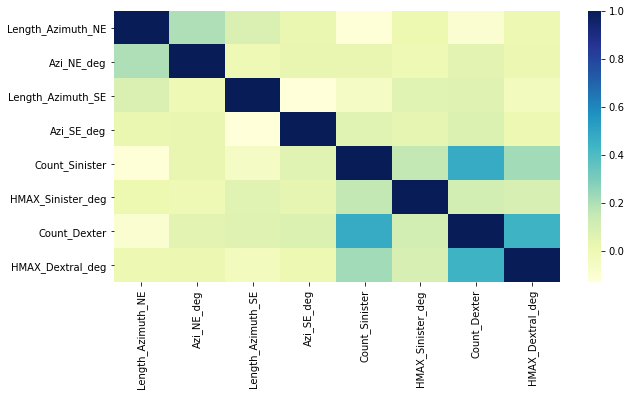

In [52]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(Coor, cmap='YlGnBu')

# Data Correlation Zone 3

In [53]:
All_zone3 = [Azimuth_NE_Region3, Azimuth_SE_Region3, Sinister_Region3, Dextral_Region3]
Alltogether_3 = pd.concat(All_zone3)
print(Alltogether_3.head())

   ID  Length  Azi_rad     Azi_deg  region  Unnamed: 5  Unnamed: 6  \
0   1   319.0    5.837  334.435465     3.0         NaN         NaN   
1   5   816.0    5.661  324.351408     3.0         NaN         NaN   
2   6   779.0    0.521   29.851101     3.0         NaN         NaN   
3   7   292.0    5.528  316.731069     3.0         NaN         NaN   
4   8   976.0    0.118    6.760902     3.0         NaN         NaN   

   Unnamed: 7  Unnamed: 8 Unnamed: 9 Unnamed: 10  COUNT  WEIGHT  HMAX_ANGLE  \
0         NaN         NaN      range   frequency    NaN     NaN         NaN   
1         NaN         NaN          0          29    NaN     NaN         NaN   
2         NaN         NaN          5          50    NaN     NaN         NaN   
3         NaN         NaN         10          64    NaN     NaN         NaN   
4         NaN         NaN         15          44    NaN     NaN         NaN   

   HMAX_LENGT  S1V  HMAX_deg  Regions  
0         NaN  NaN       NaN      NaN  
1         NaN  NaN      

In [54]:
Region3 = pd.concat([Azimuth_NE_Region3, Azimuth_SE_Region3, Sinister_Region3, Dextral_Region3], axis=1)

print(Region3.columns.values)
display(Region3)
Region3.info()

['ID' 'Length' 'Azi_rad' 'Azi_deg' 'region' 'Unnamed: 5' 'Unnamed: 6'
 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9' 'Unnamed: 10' 'ID' 'Length'
 'Azi_rad' 'Azi_deg' 'region' 'Unnamed: 5' 'Unnamed: 6' 'Unnamed: 7'
 'Unnamed: 8' 'Unnamed: 9' 'Unnamed: 10' 'ID' 'COUNT' 'WEIGHT'
 'HMAX_ANGLE' 'HMAX_LENGT' 'S1V' 'HMAX_deg' 'Regions' 'ID' 'COUNT'
 'WEIGHT' 'HMAX_ANGLE' 'HMAX_LENGT' 'S1V' 'HMAX_deg' 'Regions']


,ID,Length,Azi_rad,Azi_deg,region,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,HMAX_deg,Regions,ID,COUNT,WEIGHT,HMAX_ANGLE,HMAX_LENGT,S1V,HMAX_deg,Regions
0,1.0,319.0,5.837,334.435465,3.0,NaN,NaN,NaN,NaN,range,...,203.19819,3.0,91,1,0.001548,1.452082,0.007616,0.0,83.198186,3
1,5.0,816.0,5.661,324.351408,3.0,NaN,NaN,NaN,NaN,0,...,203.19819,3.0,92,6,0.009288,1.452082,0.045696,0.0,83.198186,3
2,6.0,779.0,0.521,29.851101,3.0,NaN,NaN,NaN,NaN,5,...,203.19819,3.0,93,11,0.017028,1.452082,0.083775,0.0,83.198186,3
3,7.0,292.0,5.528,316.731069,3.0,NaN,NaN,NaN,NaN,10,...,203.19819,3.0,95,21,0.032508,1.452082,0.159935,0.0,83.198186,3
4,8.0,976.0,0.118,6.760902,3.0,NaN,NaN,NaN,NaN,15,...,203.19819,3.0,97,31,0.047988,1.452082,0.236094,0.0,83.198186,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136198,7,0.010836,0.052731,0.053296,0.0,3.021245,3
54189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136199,8,0.012384,0.051931,0.060912,0.0,2.975413,3
54190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136201,17,0.026316,0.099559,0.129162,0.0,5.704287,3
54191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,136207,28,0.043344,0.112362,0.212624,0.0,6.437871,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54193 entries, 0 to 54192
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2448 non-null   float64
 1   Length       2448 non-null   float64
 2   Azi_rad      2448 non-null   float64
 3   Azi_deg      2448 non-null   float64
 4   region       2448 non-null   float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   74 non-null     object 
 10  Unnamed: 10  74 non-null     object 
 11  ID           2427 non-null   float64
 12  Length       2427 non-null   float64
 13  Azi_rad      2427 non-null   float64
 14  Azi_deg      2427 non-null   float64
 15  region       2427 non-null   float64
 16  Unnamed: 5   0 non-null      float64
 17  Unnamed: 6   0 non-null      float64
 18  Unnamed: 7   0 non-null      float64
 19  Unna

In [55]:
Region3.drop(Region3.columns[[0,2,4,5,6,7,8,9,10,11,13,15,16,17,18,19,
                              20,21,22,24,25,26,27,29,30,32,33,34,35,37]], axis=1, inplace=True)
display(Region3)

,Length,Azi_deg,Length,Azi_deg,COUNT,HMAX_deg,COUNT,HMAX_deg
0,319.0,334.435465,526.0,2.726305,2.0,203.19819,1,83.198186
1,816.0,324.351408,693.0,82.746794,4.0,203.19819,6,83.198186
2,779.0,29.851101,619.0,44.999991,8.0,203.19819,11,83.198186
3,292.0,316.731069,420.0,337.249032,9.0,203.19819,21,83.198186
4,976.0,6.760902,223.0,308.157214,9.0,203.19819,31,83.198186
...,...,...,...,...,...,...,...,...
54188,NaN,NaN,NaN,NaN,NaN,NaN,7,3.021245
54189,NaN,NaN,NaN,NaN,NaN,NaN,8,2.975413
54190,NaN,NaN,NaN,NaN,NaN,NaN,17,5.704287
54191,NaN,NaN,NaN,NaN,NaN,NaN,28,6.437871


In [56]:
print(Region3.columns)

Index(['Length', 'Azi_deg', 'Length', 'Azi_deg', 'COUNT', 'HMAX_deg', 'COUNT',
       'HMAX_deg'],
      dtype='object')


In [57]:
Region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54193 entries, 0 to 54192
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Length    2448 non-null   float64
 1   Azi_deg   2448 non-null   float64
 2   Length    2427 non-null   float64
 3   Azi_deg   2427 non-null   float64
 4   COUNT     53550 non-null  float64
 5   HMAX_deg  53550 non-null  float64
 6   COUNT     54193 non-null  int64  
 7   HMAX_deg  54193 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.3 MB


In [58]:
#Renaming identical columns
Region3.columns.values[0] = "Length_Azimuth_NE"
Region3.columns.values[1] = "Azi_NE_deg"
Region3.columns.values[2]  = "Length_Azimuth_SE"
Region3.columns.values[3]  = "Azi_SE_deg"
Region3.columns.values[4]  = "Count_Sinister"
Region3.columns.values[5]  = "HMAX_Sinister_deg"
Region3.columns.values[6]  = "Count_Dextral"
Region3.columns.values[7]  = "HMAX_Dextral_deg"
print(Region3.columns)


Index(['Length_Azimuth_NE', 'Azi_NE_deg', 'Length_Azimuth_SE', 'Azi_SE_deg',
       'Count_Sinister', 'HMAX_Sinister_deg', 'Count_Dextral',
       'HMAX_Dextral_deg'],
      dtype='object')


In [59]:
Coor3 = Region3.corr()
display(Coor3)

,Length_Azimuth_NE,Azi_NE_deg,Length_Azimuth_SE,Azi_SE_deg,Count_Sinister,HMAX_Sinister_deg,Count_Dextral,HMAX_Dextral_deg
Length_Azimuth_NE,1.000000,0.107270,-0.020889,0.032506,0.036421,0.015082,0.023812,0.000075
Azi_NE_deg,0.107270,1.000000,-0.010124,-0.045055,-0.009297,-0.022090,-0.002483,0.009791
Length_Azimuth_SE,-0.020889,-0.010124,1.000000,-0.063494,-0.020269,0.020852,-0.019701,-0.058878
Azi_SE_deg,0.032506,-0.045055,-0.063494,1.000000,-0.046204,-0.006674,-0.008203,-0.020162
Count_Sinister,0.036421,-0.009297,-0.020269,-0.046204,1.000000,0.121382,0.221921,-0.068296
HMAX_Sinister_deg,0.015082,-0.022090,0.020852,-0.006674,0.121382,1.000000,0.024009,0.149538
Count_Dextral,0.023812,-0.002483,-0.019701,-0.008203,0.221921,0.024009,1.000000,0.044801
HMAX_Dextral_deg,0.000075,0.009791,-0.058878,-0.020162,-0.068296,0.149538,0.044801,1.000000


<AxesSubplot:>

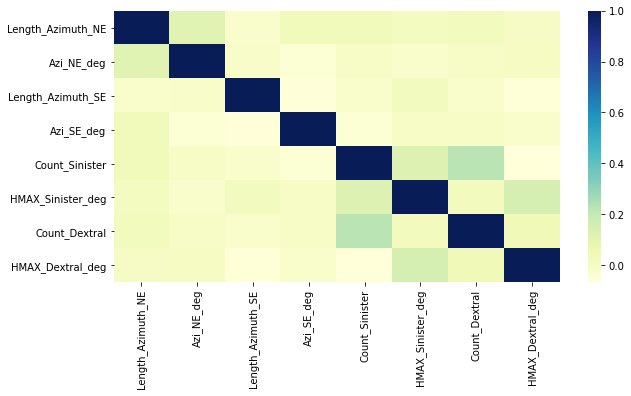

In [60]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(Coor3, cmap='YlGnBu')